## **Day 08 of 30 days Data Analysis**

### ***Data Cleaning and preprocessing***

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [12]:
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\datasets\\SuperMarket Analysis.csv")

In [13]:
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(1000, 17)

### ***Checked for missing values using:***

In [14]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### ***Result:*** *No missing values were found in the dataset.*

### ***Duplicatees - Checked for duplicate rows using:***

In [15]:
df.isna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.drop_duplicates(inplace= True)

### ***Result:*** *No duplicate records were found.*

### ***Outlier Detection - Created boxplots foe each numeric column to visually inspect inspect for outliers:***

In [18]:
numeric_cols= df.select_dtypes(include= ["float64", "int64"]).columns

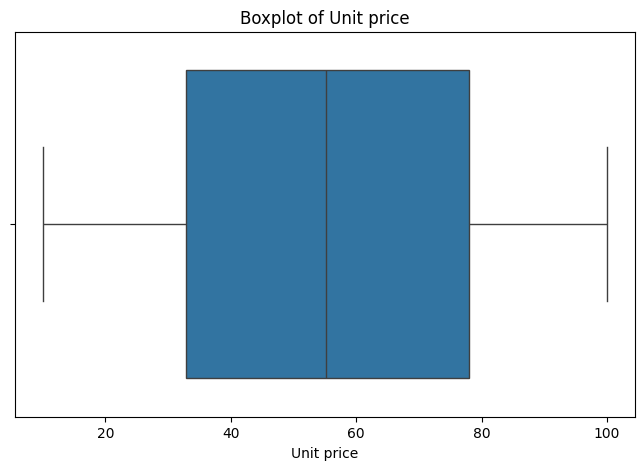

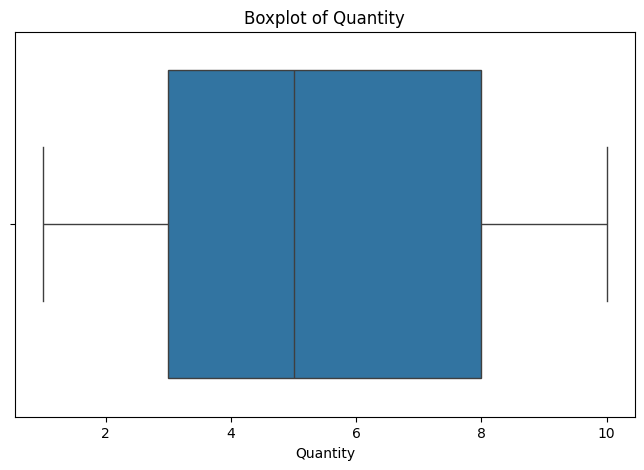

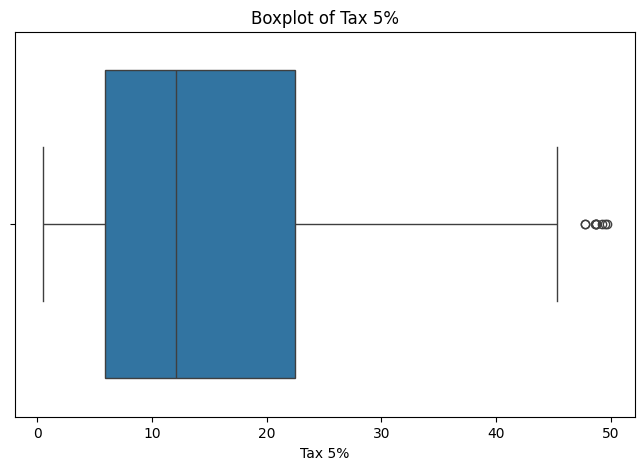

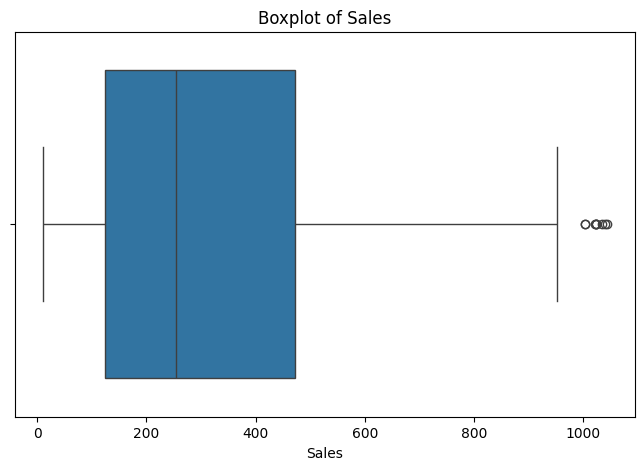

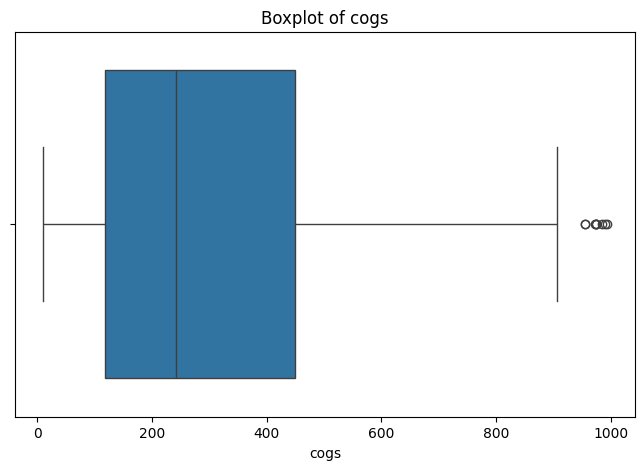

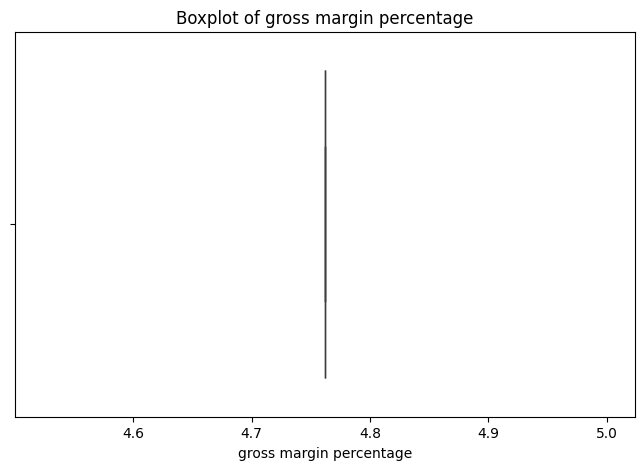

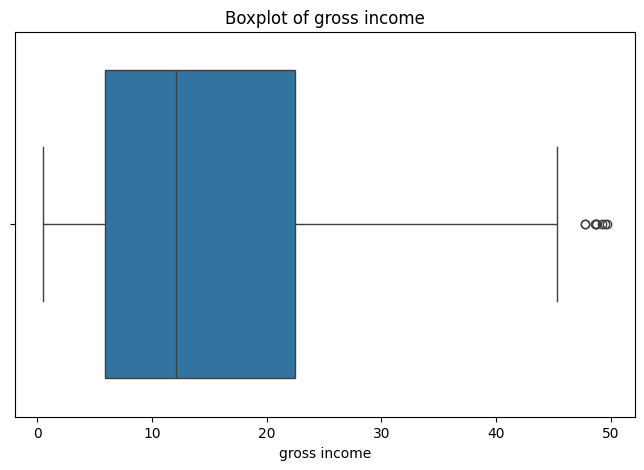

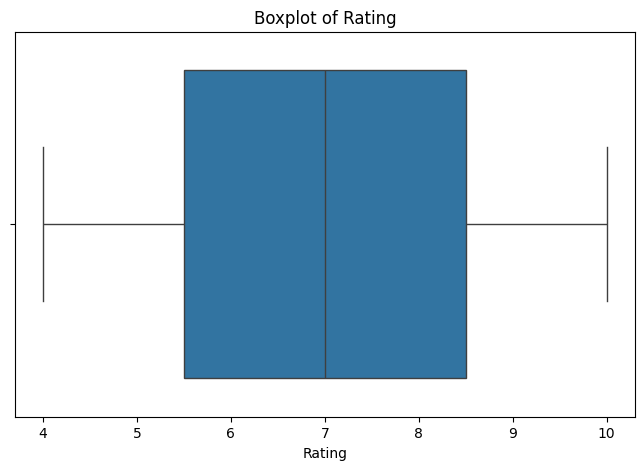

In [19]:
for col in numeric_cols:
    plt.figure(figsize= (8,5))
    sns.boxplot(x= df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### *Boxplots revealed a few extreme values in some numerical fields. These can be addressed by removing rows outside the acceptable range:*

In [20]:
# df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

Unit price                 0
Quantity                   0
Tax 5%                     9
Sales                      9
cogs                       9
gross margin percentage    0
gross income               9
Rating                     0
dtype: int64


In [21]:
df_no_outliers = df[~(
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
.any(axis = 1))]

### ***Date and Time Formatting:***

*- Converted the `Date` column to datetime format,*

*- Converted the `Time` column to datetime format,*

*- Converted the `Text` column to category format.*

In [22]:
# Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Time to datetime
df["Time"] = df["Time"].astype(str).str.strip()
df["Time"] = pd.to_datetime(df["Time"], format= "%I:%M %p", errors= "coerce").dt.time

# Text columns to category
cat_cols = df.select_dtypes(include= "object").columns
for col in cat_cols:
    df[col] = df[col].astype("category")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8780\3729308659.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


### ***Export Cleaned Data***

*- Finaly, exported the cleaned dataset for further analysis:*

In [23]:
df.to_csv("supermarket_clean_d08.csv", index= False)